In [1]:
%pylab inline
import csv
#Imports rcParams, which is the inline equivalent of stylesheet properties:
from pylab import rcParams

with open ('Ability_To_Speak_English_By_Language.csv') as f:
    records = [row for row in csv.reader(f)]

#These functions were for a graph idea I gave up on
#def makeflatlist(part,n):
#    return [i for sub in [part for i in range(n)] for i in sub]
#
#def flattenlist(list):
#    return [i for sub in list for i in sub]

records.remove(records[5]) #deletes an empty data field

#Clean up the titles:
for x in records[1:]:
    n = x[0].find('.')
    if(n != -1):
        foo = x[0][(n+2):]
        x[0] = foo
        
#Convert all the data to actual numbers
for x in range(1,len(records)):
    for y in range(1,len(records[x])):
        records[x][y] = int(records[x][y])

Populating the interactive namespace from numpy and matplotlib


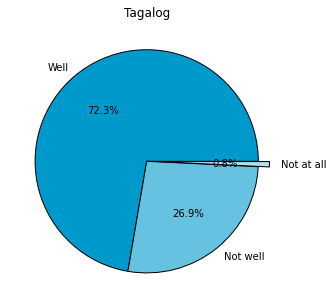

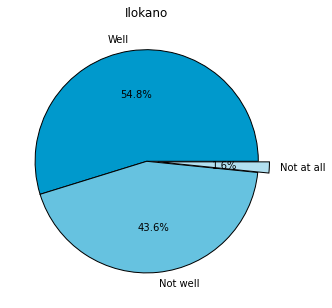

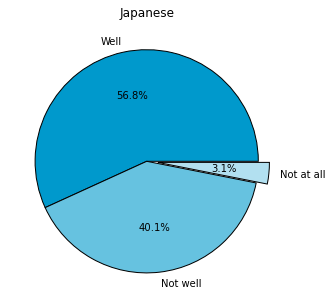

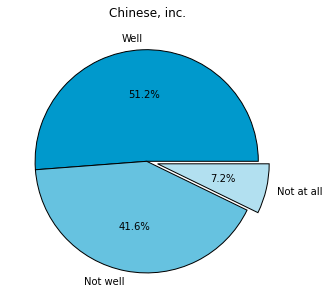

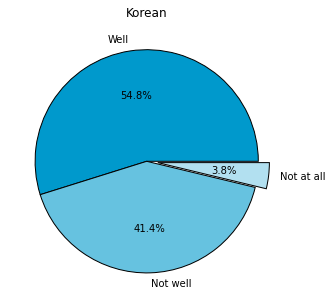

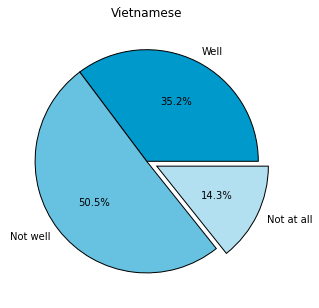

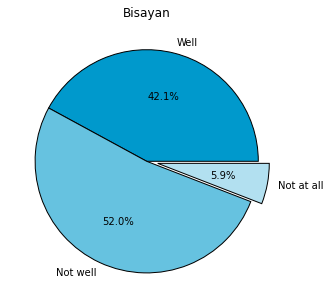

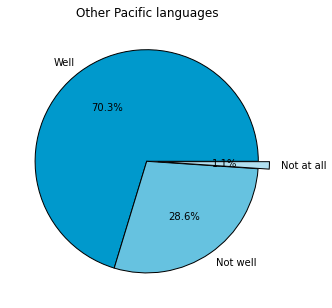

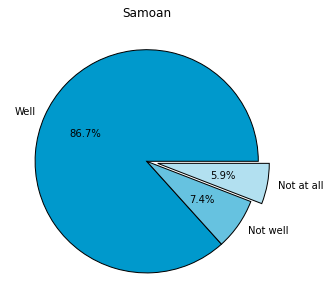

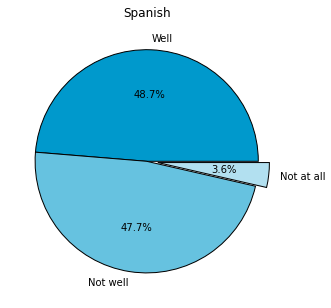

In [2]:
colors = ['#0099CC', '#66C2E0','#B2E0F0']
for i in records[1:]:
    fig = figure(figsize=[5,5])
    fig.add_subplot(111)
    pie(i[1:],labels=['Well','Not well','Not at all'],explode=[0,0,.1],autopct='%1.1f%%',colors=colors)
    title(i[0])


In [4]:
#'#0033CC','#1947D1','#3059D6','#456ADA','#5879DE','#6986E1','#7892E4','#869DE7'


[['Language spoken at home', 'Well', 'Not Well', 'Not at All'], ['Tagalog', 7.2307033813668138, 2.6926095020687684, 0.076687116564417179], ['Ilokano', 5.4777706700783622, 4.3623060930753237, 0.15992323684631379], ['Japanese', 5.6813760169791294, 4.0077821011673151, 0.31084188185355499], ['Chinese, inc.', 5.1208931419457739, 4.1582137161084534, 0.72089314194577359], ['Korean', 5.4833712984054674, 4.1403189066059225, 0.37630979498861045], ['Vietnamese', 3.524101823433833, 5.0478425708611665, 1.4280556057050009], ['Bisayan', 4.2076124567474054, 5.2041522491349479, 0.58823529411764708], ['Other Pacific languages', 7.0299071845995185, 2.8635269852182881, 0.10656583018219319], ['Samoan', 8.6682615629984046, 0.74428495481127066, 0.58745348219032423], ['Spanish', 4.869751762182041, 4.7716825007661665, 0.35856573705179284]]


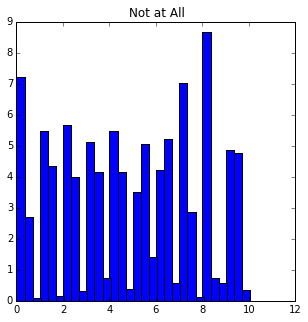

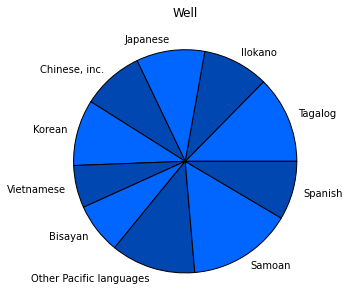

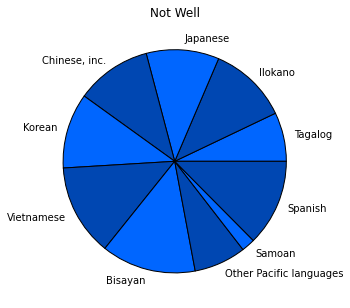

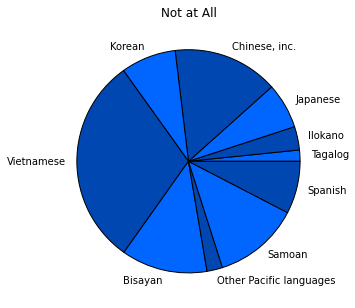

In [5]:
precords = [x[:] for x in records] #Deep copy!

#Converts each piece of data to the percentage of total speakers (percent of Spanish speakers who speak
#English well, not wel, etc etc etc)
for i in range(1,len(precords)):
    x = sum(precords[i][1:])
    for n in range(1,len(precords[i])):
        precords[i][n] = (precords[i][n]/x)*10

colors2 = ['#0066FF', '#0047B2',]
fig = figure(figsize=[5,5])
fig.add_subplot(111)
width = 0.35

for i in range(len(precords[0][1:])):
    bar(arange(10)+(width*i),[r[i+1] for r in precords[1:]],width)
    title(precords[0][i+1])

for i in range(len(records[0][1:])):
    fig = figure(figsize=[5,5])
    fig.add_subplot(111)
    pie([r[i+1] for r in precords[1:]],labels=[r[0] for r in precords[1:]],colors=colors2)
    title(precords[0][i+1])